# Regressie - intro

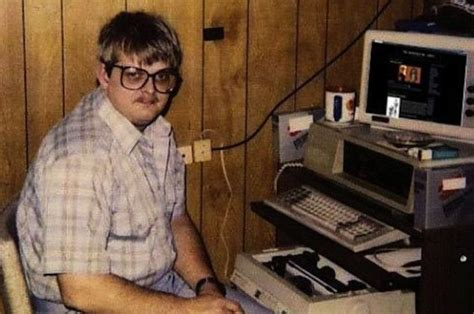

## Install

In [16]:
!pip3 install numpy
!pip3 install scipy

## Import

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [18]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [19]:
# define area list
area_50_75 = np.array(range(50, 80, 5))
# add noise
noise = np.random.normal(0,25000,6)
# calc house prices
p_50_75 = 25_000 + 5_000 * area_50_75 + noise
print(list(zip(area_50_75, p_50_75)))

[(50, 279553.1766420607), (55, 269911.59137791203), (60, 340751.0823583045), (65, 334684.40347968275), (70, 363861.6554795806), (75, 377782.73292400374)]



### Stap 2: Bekijk interval [50, 75] m2

Text(0, 0.5, 'Houseprice in EUR')

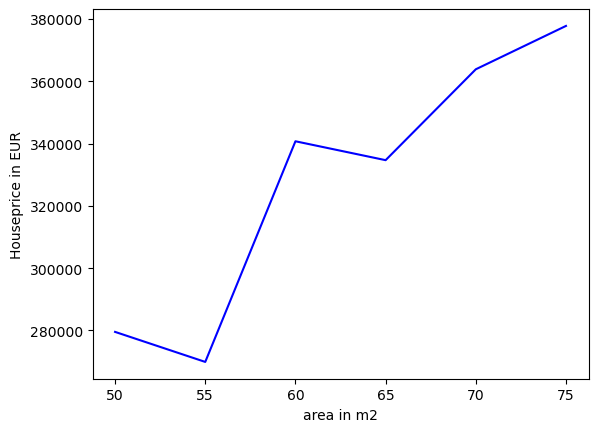

In [20]:
# plot data area and house prices
plt.plot(area_50_75, p_50_75, 'b-', label="data") 
plt.xlabel("area in m2")
plt.ylabel("Houseprice in EUR")

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

4382.464588300265 53853.40373045811


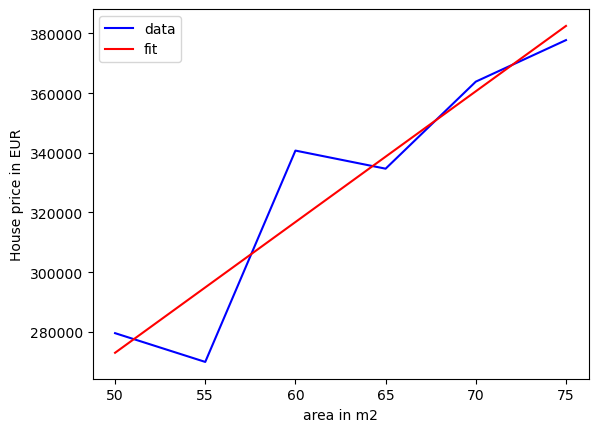

In [21]:
# Define our model

def calc_house_price(x, a, b):
    return a * x + b

# Use scipy optimize package
# Create fit

popt, _ = cp.optimize.curve_fit(calc_house_price, area_50_75, p_50_75)
print(*popt)

# Plot fit
# plot data
plt.plot(area_50_75, p_50_75, 'b-', label="data") 
plt.xlabel("area in m2")
plt.ylabel("House price in EUR")
# plot fit
plt.plot(area_50_75, calc_house_price(area_50_75, *popt), 'r-', label='fit')
plt.legend()


plt.show()

### Stap 4: Extrapoleer

[ 4823.42835695 50522.8607408 ]


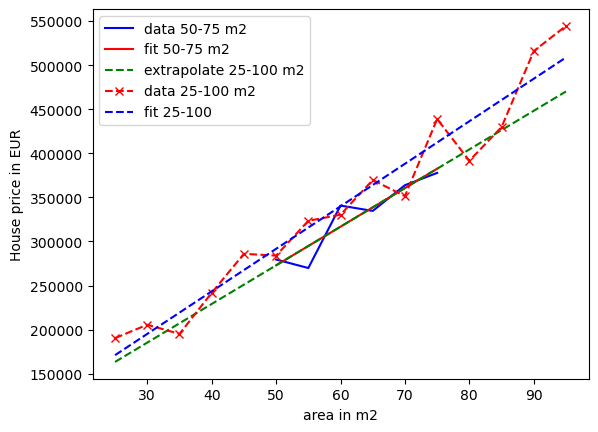

In [22]:
# Plot prediction for whole range
# predict for whole range
predicted_house_prices = [calc_house_price(x, *popt) for x in range(25, 100, 5)]


# plot data
plt.plot(area_50_75, p_50_75, 'b-', label="data 50-75 m2") 
plt.xlabel("area in m2")
plt.ylabel("House price in EUR")
# plt fit
plt.plot(area_50_75, calc_house_price(area_50_75, *popt), 'r-', label='fit 50-75 m2')
# 
plt.plot(list(range(25, 100, 5)), predicted_house_prices, 'g--', label='extrapolate 25-100 m2')


# Create fit for whole range
area_25_100 = np.array(range(25, 100, 5))
# add noise
noise = np.random.normal(0,25000,15)
# calc house prices
p_25_100 = 25_000 + 5_000 * area_25_100 + noise
popt, _ = cp.optimize.curve_fit(calc_house_price, area_25_100, p_25_100)
print(popt)
plt.plot(area_25_100, p_25_100, 'rx--', label='data 25-100 m2')
plt.plot(area_25_100, calc_house_price(area_25_100, *popt), 'b--', label='fit 25-100')
plt.legend()
plt.show()



## Polynomiale verbanden

### Model

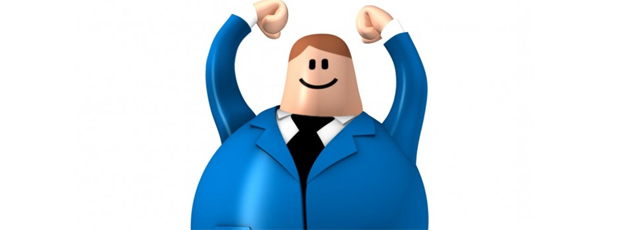

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

[(1, -82.317425395962), (2, -8.733985731675617), (3, -346.9592156685429), (4, 281.4559222492062), (5, 157.72438649564052), (6, 217.3270216589587), (7, 361.16315579996143), (8, 543.354722765768), (9, 721.7668204932613), (10, 981.4853275583135), (11, 1445.0753130178348), (12, 1739.1143029516986), (13, 2281.6311526891363), (14, 3095.5877662955586), (15, 3598.238361215647), (16, 4189.308125440734), (17, 5099.247972017327), (18, 5969.2443180157325), (19, 7089.359228457902)]


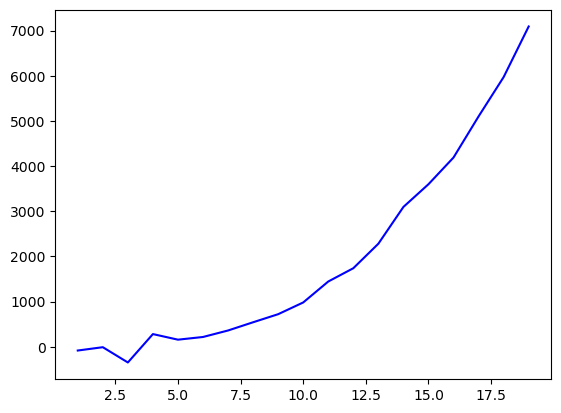

In [23]:
r = np.array(range(1, 20, 1))
# add noise
noise = np.random.normal(0,150,19)
mass_bolman = 1.03 * r**3 + 12.4 + 8.7 + 3.2 + noise
print(list(zip(r, mass_bolman)))

plt.plot(r, mass_bolman, 'b-')
plt.show()

### Stap 2: Fit data

1.0407373023744766 -12.502281336287231


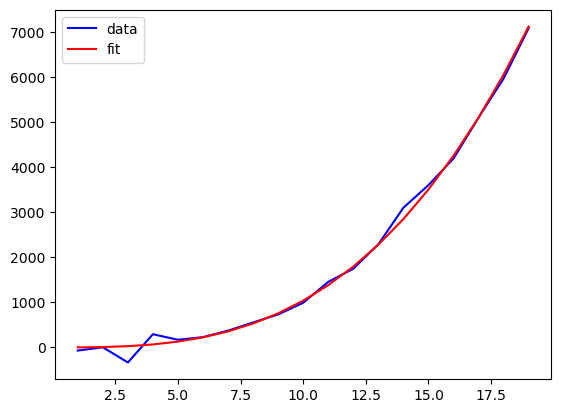

In [27]:
# Define our model

def calc_mass_bolman(x, a, b):
    return a * x**3 + b

# Use scipy optimize package
# Create fit

popt, _ = cp.optimize.curve_fit(calc_mass_bolman, r, mass_bolman)
print(*popt)


# Plot fit

plt.plot(r, mass_bolman, 'b-', label="data")
plt.plot(r, calc_mass_bolman(r, *popt), 'r-', label="fit")
plt.legend()
plt.show()

# linear regression does not result in satisfactory fit with polynomial functions

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861